In [ ]:
!pip install -q xlrd

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import RFE
from matplotlib import pyplot
from sklearn.metrics import mean_absolute_percentage_error, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [ ]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ds = pd.read_excel("/content/drive/MyDrive/CSUEB/capstone/data/16.xlsx",header=0)
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95394 entries, 0 to 95393
Data columns (total 57 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               95394 non-null  float64
 1   iyear                    95394 non-null  float64
 2   imonth                   95394 non-null  float64
 3   iday                     95394 non-null  float64
 4   date_num                 95394 non-null  float64
 5   extended                 95394 non-null  float64
 6   hdi2019                  95394 non-null  float64
 7   unemployment_rate        95394 non-null  float64
 8   country                  95394 non-null  float64
 9   region                   95394 non-null  float64
 10  latitude                 95394 non-null  float64
 11  longitude                95394 non-null  float64
 12  combined_lon_lat         95394 non-null  float64
 13  combined_lat_lon         95394 non-null  float64
 14  specificity           

In [ ]:
ds=ds[['iyear','imonth','iday','date_num', 'extended', 'country', 'region', 'specificity',
'vicinity',	'crit1', 'crit2', 'crit3', 'doubtterr',	'multiple',	'success',	'suicide',	'targtype1',	'targsubtype1',
'natlty1', 'guncertain1', 'individual', 'claimed',	'weaptype1', 'weapsubtype1', 'nkill',	'nkillter',	'nwound',
'nwoundte',	'property',	'ishostkid','INT_LOG',	'INT_IDEO',	'INT_MISC',	'INT_ANY', 'provstate',	'city',	'corp1', 
'target1','gname', 'country_type', 'hdi2019','unemployment_rate','latlon','latitude','longitude',"combined_lon_lat","combined_lat_lon","gdp"]]

In [ ]:
feat_labels = ds.columns.values.tolist()

# define min max scaler
scaler = MinMaxScaler(feature_range=(0,1))
# transform data
scaled = scaler.fit_transform(ds)

X = ds[['extended', 'country', 'region', 'specificity',
'vicinity',	'crit1', 'crit2', 'crit3', 'doubtterr',	'multiple',	'success',	'suicide',	'targtype1',	'targsubtype1',
'natlty1', 'guncertain1', 'individual', 'claimed',	'weaptype1', 'weapsubtype1', 'nkill',	'nkillter',	'nwound',
'nwoundte',	'property',	'ishostkid','INT_LOG',	'INT_IDEO',	'INT_MISC',	'INT_ANY', 'provstate',	'city',	'corp1', 
'target1','gname', 'country_type', 'hdi2019','unemployment_rate','latitude','longitude',"gdp"]]
y = ds['date_num']


In [ ]:
l = int( len(X)/10)
X_train, X_test = X[0:9*l] , X[9*l:] 
y_train, y_test = y[0:9*l] , y[9*l:] 

In [ ]:
rfe = RFE(RandomForestRegressor(n_estimators=10, random_state=1), n_features_to_select=5)
fit = rfe.fit(X_train, y_train)
y_pred = fit.predict(X_test)

In [ ]:
y_pred = fit.predict(X_test)

In [ ]:
testDF = pd.DataFrame(y_test)
predDF = pd.DataFrame(y_pred)
testDF.head()

,date_num
85851,"17,934.0000000"
85852,"17,934.0000000"
85853,"17,934.0000000"
85854,"17,934.0000000"
85855,"17,934.0000000"


In [ ]:
MAPE = mean_absolute_percentage_error(testDF , predDF) 
MAPE

0.09891312625390103

In [ ]:
for i in range(X.shape[1]):
  if rfe.ranking_[i]<=5:
    print('Column: %s, Selected %s, Rank: %.3f' % (X.columns.values.tolist()[i], rfe.support_[i], rfe.ranking_[i]))

Column: country, Selected False, Rank: 3.000
Column: region, Selected True, Rank: 1.000
Column: claimed, Selected True, Rank: 1.000
Column: corp1, Selected False, Rank: 2.000
Column: hdi2019, Selected True, Rank: 1.000
Column: unemployment_rate, Selected True, Rank: 1.000
Column: latitude, Selected False, Rank: 5.000
Column: longitude, Selected False, Rank: 4.000
Column: gdp, Selected True, Rank: 1.000


Selected Features:
date_num
0.26248670480585845
targsubtype1
0.13962623844450625
city
0.18049727477712307
target1
0.2338918265256936
latlon
0.18349795544681852


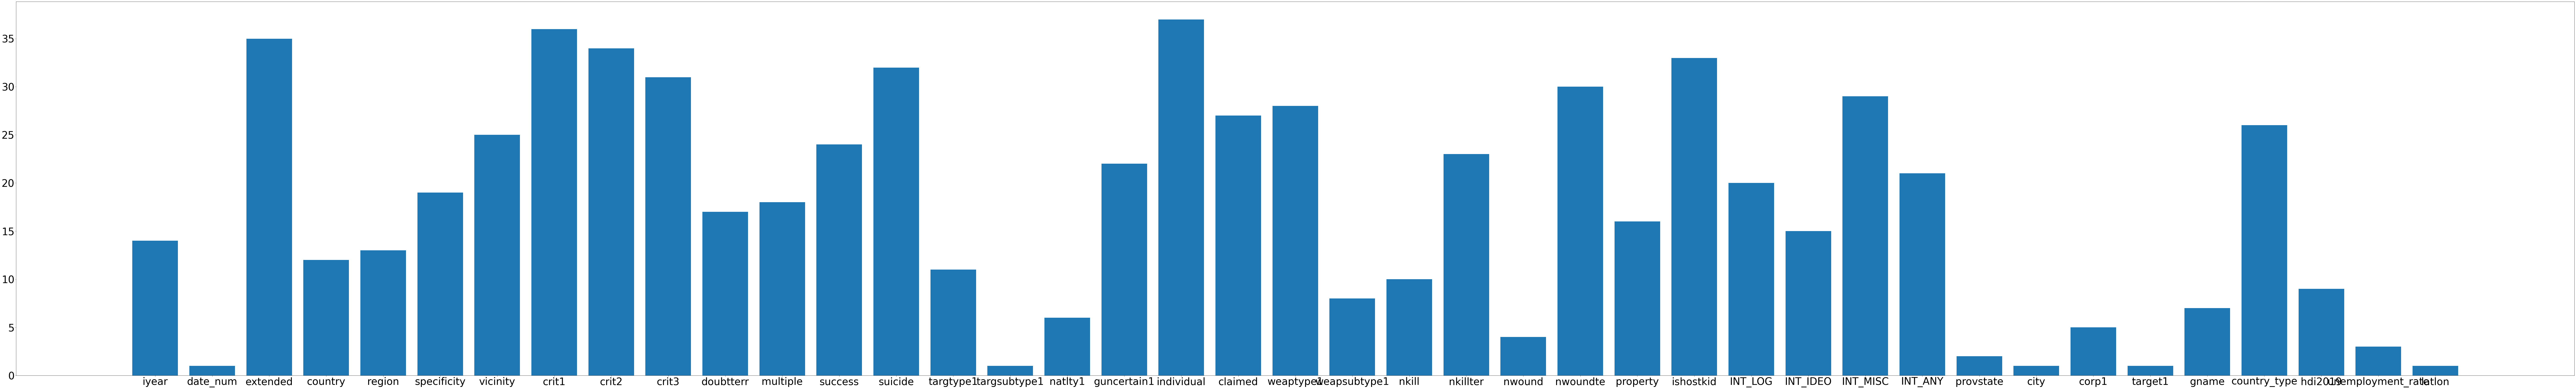

<Figure size 45000x18000 with 0 Axes>

In [ ]:
print('Selected Features:')
names = X.columns.values[0:]
j=0
for i in range(len(fit.support_)):
	if fit.support_[i]:
		print(names[i])
	
ticks = [i for i in range(len(names))]
pyplot.bar(ticks, fit.ranking_)
pyplot.xticks(ticks, names)
pyplot.rcParams["figure.figsize"] = (200,30)
pyplot.rcParams.update({'font.size': 44})
pyplot.figure(figsize=(250, 100), dpi=180)
pyplot.show()

z = zip(names,fit.ranking_)

In [ ]:
clf = RandomForestRegressor(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)
for feature in zip(feat_labels, clf.feature_importances_):
    print(feature)